[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 2.25, 2.3000000000000003, 2.35, 2.4000000000000004, 2.45, 2.5, 2.5500000000000003, 2.6, 2.6500000000000004, 2.7, 2.75, 2.8000000000000003, 2.85, 2.9000000000000004, 2.95, 3.0, 3.0500000000000003, 3.1, 3.1500000000000004, 3.2, 3.25, 3.3000000000000003, 3.35, 3.4000000000000004, 3.45, 3.5, 3.5500000000000003, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8000000000000003, 3.85, 3.9000000000000004, 3.95]
./configs/harmonic_driven.json
5.0
125.66370614359172
./configs/harmonic_driven.json
5.0
62.83185307179586
./configs/harmonic_

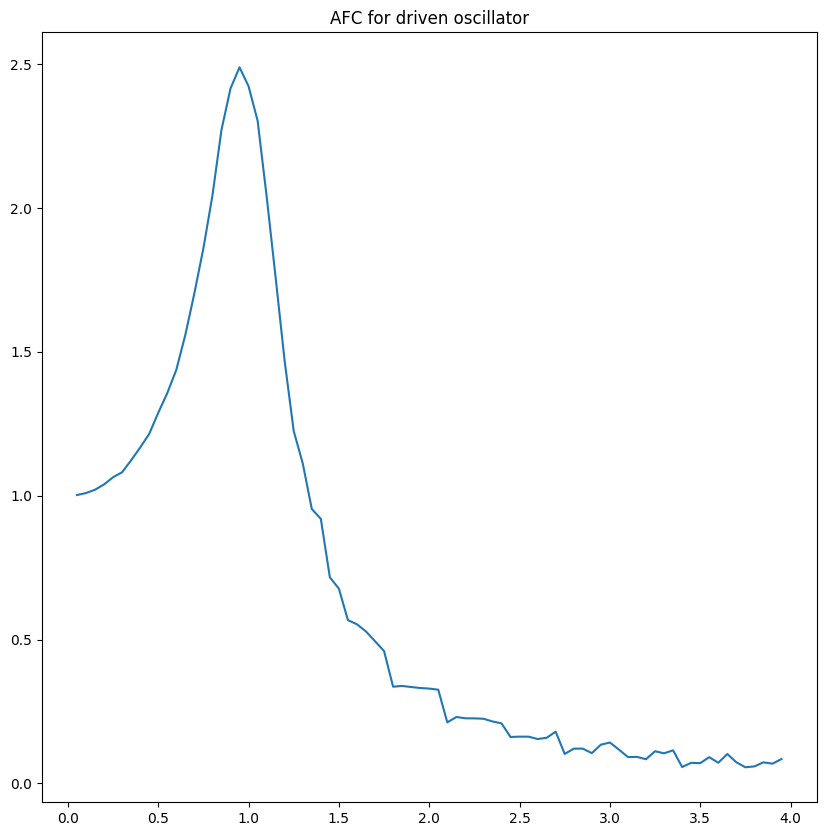

In [1]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data
# Analytical solution for equation with force
# Sympy

# Unlinear viscosity
# Harmonic force
# Unharmonic periodic force

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.2,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 800
                                            })

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        divider = 20
        omegas = [damped_config['w'] / divider * i for i in range (1, divider * 4)]
        print(omegas)

        amplitudes = []
    
        for omega in omegas:

            damped_config['Omega'] = omega
            damped_config.write()
            
            solver_program_path = './solver.exe'
            run_config(solver_program_path, damped_config.name)
            
            solver_name = damped_config['solver']
            damp_ratio = damped_config['damp_ratio']
        
            ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
            ses_info = SesInfo(ses_name, damped_config, Style('.'))
            
            amplitude = find_steady_state_amplitude(damped_config['w'],
                                                    damped_config['damp_ratio'],
                                                    damped_config['Omega'],
                                                    damped_config['t2'] / damped_config['sampleNum'],
                                                    ses_info.data)
            
            amplitudes.append(amplitude)
        
        ax.plot(omegas, amplitudes)
    
        # plt.savefig('damped_driven_different_omegas.svg')
     

steady time: 5.0
force period time: 1.5707963267948966
dt: 0.0625
0.06172905


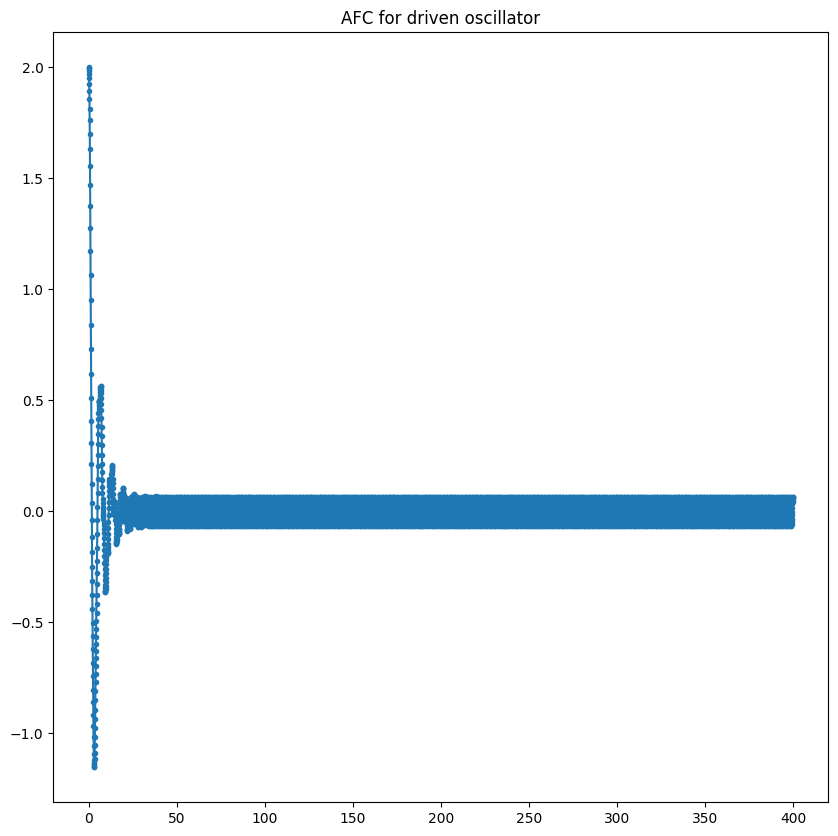

In [5]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

# add meandr, half-harmonic

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.2,
                                        	"A" : 1,
                                        	"Omega" : 0.05,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 6400
                                            })

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        omega = damped_config['Omega'] = 4
        damped_config.write()
    
        solver_program_path = './solver.exe'
        run_config(solver_program_path, damped_config.name)
        
        solver_name = damped_config['solver']
        damp_ratio = damped_config['damp_ratio']
    
        ses_name = f'harmonic driven {solver_name}, Omega = {omega}'
        ses_info = SesInfo(ses_name, damped_config, Style('.'))
        
        amplitude = find_steady_state_amplitude(damped_config['w'],
                                                damped_config['damp_ratio'],
                                                damped_config['Omega'],
                                                damped_config['t2'] / damped_config['sampleNum'],
                                                ses_info.data)
        print(amplitude)
        SesPlotter.plot_x(ses_info, ax)
    # plt.savefig('damped_driven_different_omegas.svg')
 

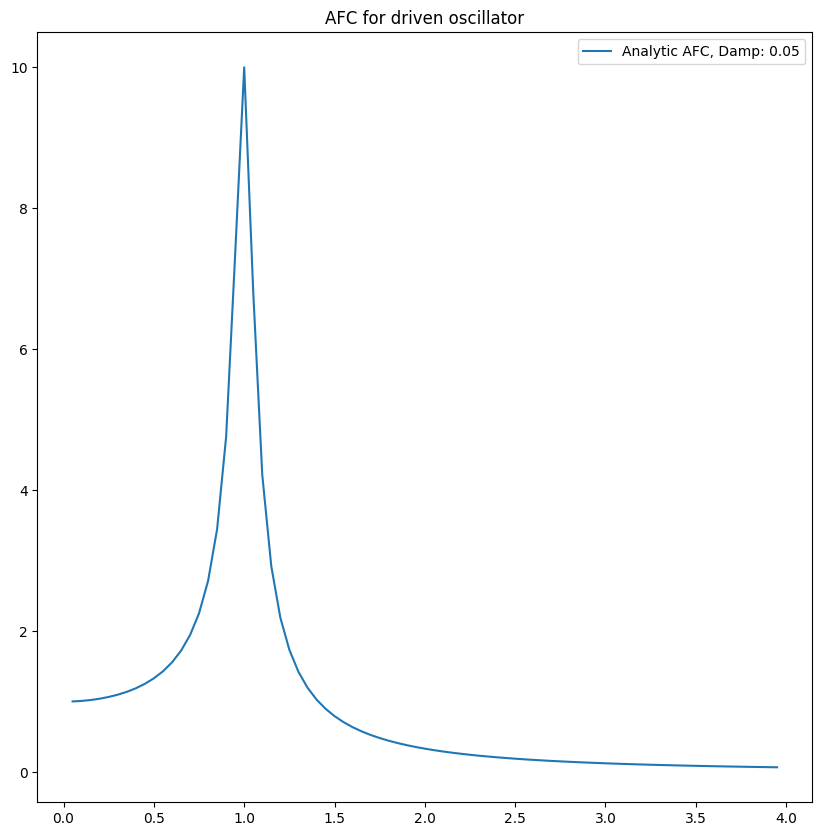

In [21]:
from src.plot_context import *
from src.config_helper import *
from src.plotter import *
from src.AFC import *

import matplotlib.pyplot as plt

# sympy
# plot only range
# virutal inheritance (both damped and driven and physic)
# make damped, driven only function that init DiffEq
# make GUI
# make visualization
# find amplitude of dataset
# Make report
# add delta t to bin data

def prepare_harmonic_and_physic():

    fig, ax = plt.subplots(1)
    ax.set_title('AFC for driven oscillator')
    fig.set_size_inches(10, 10)
    # axs.set_xlabel('Time sample')
    # axs.set_ylabel('X coordiante')
    
    return fig, ax

damped_config = Config('harmonic_driven',{
                                        	"model" : "HarmonicDriven",
                                        	"solver" : "rk4",
                                        	"output" : "harmonic_driven.bin",
                                        
                                        	"m" : 1,
                                        	"w" : 1,
                                        	"damp_ratio" : 0.9,
                                        	"A" : 1,
                                        	"Omega" : 2,
                                        
                                        	"x0" : 2, 
                                        	"v0" : 0,
                                        
                                        	"t1" : 0,
                                        	"t2" : 400,
                                        	"sampleNum" : 2000
                                            })

def get_analytic_amplitude(w0, damp_ratio, m, A, omega):

    Z = ((2 * w0 * damp_ratio) ** 2 + omega ** (-2) * (w0**2 - omega**2) ** 2) ** 0.5
    
    return A / (m * omega * Z)

with PlotContextManager(prepare_harmonic_and_physic, "driven_AFC") as ax:

        damp_ratios = [0.05]

        for damp_ratio in damp_ratios:

            # print(damp_ratio)
            
            amplitudes = []
            analytical_amplitudes = []
    
            divider = 20
            omegas = [damped_config['w'] / divider * i for i in range (1, divider * 4)]
    
            for omega in omegas:
    
                damped_config['Omega'] = omega
                damped_config['damp_ratio'] = damp_ratio
                damped_config.write()
                
                solver_program_path = './solver.exe'
                run_config(solver_program_path, damped_config.name)
                
                solver_name = damped_config['solver']
                damp_ratio = damped_config['damp_ratio']
            
                ses_name = f'harmonic driven {solver_name}, Omega = {omega}, Damp = {damp_ratio}'
                ses_info = SesInfo(ses_name, damped_config, Style('.'))
    
                amplitude = find_steady_state_amplitude(damped_config['w'],
                                                        damped_config['damp_ratio'],
                                                        damped_config['Omega'],
                                                        damped_config['t2'] / damped_config['sampleNum'],
                                                        ses_info.data,
                                                        8)
                
                amplitudes.append(amplitude)
                
                analytical_amplitudes.append(get_analytic_amplitude(damped_config['w'],
                                                                      damped_config['damp_ratio'],
                                                                      damped_config['m'],
                                                                      damped_config['A'],
                                                                      omega))
        
            # ax.scatter(omegas, np.array(amplitudes), label = "Simulated solution")
            ax.plot(omegas, np.array(analytical_amplitudes), label = f"Analytic AFC, Damp: {damp_ratio:.2}")
        
        ax.legend()
        plt.savefig('peak_by_damp.svg')

In [23]:
import sympy as sp

In [31]:
x, y = sp.symbols('x y')

equ1 = sp.Eq(y, x)
equ2 = sp.Eq(y, x**2)

print(sp.solve((equ1, equ2), (x, y)))

[(0, 0), (1, 1)]


In [88]:
x = sp.Function('x')
t, m, k, Omega, w0, damp, A = sp.symbols('t m k Omega w0 damp A', real = True, positive = True)

der_f = sp.Eq(sp.Derivative(x(t), t, t) - 2 * damp * sp.Derivative(x(t), t) * w0 + w0 ** 2 * x(t), A * sp.cos(Omega * t))

print(der_f)

sol = sp.dsolve(der_f)
der = sp.diff(sol.rhs, t)

print('')

print(sp.trigsimp(sol))

print('')

print(der.doit())

print('')

print(der)

C1, C2, x0, v0 = sp.symbols('C1, C2, x0, v0')

equx0 = sp.Eq(sol.rhs, x0)
equv0 = sp.Eq(der, v0)

print('equs:')

print(equx0)
print(equv0)

print('')

consts = sp.solve((equx0, equv0), (C1, C2))

print(consts[C1])

print('')

print(consts[C2])

print('')

C1_t0 = consts[C1].subs({t: 0})

print(sp.simplify(C1_t0))

Eq(-2*damp*w0*Derivative(x(t), t) + w0**2*x(t) + Derivative(x(t), (t, 2)), A*cos(Omega*t))

Eq(x(t), -A*Omega**2*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - 2*A*Omega*damp*w0*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + A*w0**2*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + C1*exp(t*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))) + C2*exp(t*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1))))

A*Omega**3*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - 2*A*Omega**2*damp*w0*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - A*Omega*w0**2*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + C1*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))*exp(t*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))) + C2*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1))*exp(t*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1)))

A*Omega**3*sin(Omega*t)/(Omega**4 + 

KeyboardInterrupt: 

In [86]:
from sympy.utilities.codegen import codegen

[(c_name, c_code), (h_name, h_code)] = codegen(('C1', consts[C1]), 'c99', 'test', header=False, empty=False)

print(c_code)

#include "test.h"
#include <math.h>
double C1(double A, double Omega, double damp, double t, double v0, double w0, double x0) {
   double C1_result;
   C1_result = A*pow(Omega, 3)*sqrt(damp - 1)*sqrt(damp + 1)*exp(t*w0*sqrt(damp - 1)*sqrt(damp + 1))*sin(Omega*t)/(2*pow(Omega, 4)*pow(damp, 2)*w0*exp(damp*t*w0) - 2*pow(Omega, 4)*w0*exp(damp*t*w0) + 8*pow(Omega, 2)*pow(damp, 4)*pow(w0, 3)*exp(damp*t*w0) - 12*pow(Omega, 2)*pow(damp, 2)*pow(w0, 3)*exp(damp*t*w0) + 4*pow(Omega, 2)*pow(w0, 3)*exp(damp*t*w0) + 2*pow(damp, 2)*pow(w0, 5)*exp(damp*t*w0) - 2*pow(w0, 5)*exp(damp*t*w0)) + A*pow(Omega, 2)*pow(damp, 2)*w0*exp(t*w0*sqrt(damp - 1)*sqrt(damp + 1))*cos(Omega*t)/(2*pow(Omega, 4)*pow(damp, 2)*w0*exp(damp*t*w0) - 2*pow(Omega, 4)*w0*exp(damp*t*w0) + 8*pow(Omega, 2)*pow(damp, 4)*pow(w0, 3)*exp(damp*t*w0) - 12*pow(Omega, 2)*pow(damp, 2)*pow(w0, 3)*exp(damp*t*w0) + 4*pow(Omega, 2)*pow(w0, 3)*exp(damp*t*w0) + 2*pow(damp, 2)*pow(w0, 5)*exp(damp*t*w0) - 2*pow(w0, 5)*exp(damp*t*w0)) - A*pow(Omega, 2

In [91]:
x = sp.Function('x')
t, m, k, Omega, w0, damp, A = sp.symbols('t m k Omega w0 damp A', real = True, positive = True)

der_f = sp.Eq(sp.Derivative(x(t), t, t) - 2 * damp * sp.Derivative(x(t), t) * w0 + w0 ** 2 * x(t), A * sp.cos(Omega * t))

print(der_f)

sol = sp.dsolve(der_f)
der = sp.diff(sol.rhs, t)

print('')

print(sp.trigsimp(sol))

print('')

print(der.doit())

print('')

print(der)

C1, C2, x0, v0 = sp.symbols('C1, C2, x0, v0')

equx0 = sp.Eq(sol.rhs, x0)
equv0 = sp.Eq(der, v0)

print('equs:')

print(equx0)
print(equv0)

print('')

consts = sp.solve((equx0, equv0), (C1, C2))

print(consts[C1])

print('')

print(consts[C2])

print('')

C1_t0 = consts[C1].subs({t: 0})
C1_t0 = sp.simplify(C1_t0) 

print(C1_t0)

C2_t0 = consts[C2].subs({t: 0})
C2_t0 = sp.simplify(C2_t0) 

print(C2_t0)

Eq(-2*damp*w0*Derivative(x(t), t) + w0**2*x(t) + Derivative(x(t), (t, 2)), A*cos(Omega*t))

Eq(x(t), -A*Omega**2*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - 2*A*Omega*damp*w0*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + A*w0**2*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + C1*exp(t*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))) + C2*exp(t*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1))))

A*Omega**3*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - 2*A*Omega**2*damp*w0*cos(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) - A*Omega*w0**2*sin(Omega*t)/(Omega**4 + 4*Omega**2*damp**2*w0**2 - 2*Omega**2*w0**2 + w0**4) + C1*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))*exp(t*w0*(damp - sqrt(damp - 1)*sqrt(damp + 1))) + C2*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1))*exp(t*w0*(damp + sqrt(damp - 1)*sqrt(damp + 1)))

A*Omega**3*sin(Omega*t)/(Omega**4 + 

In [93]:
from sympy.utilities.codegen import codegen

[(c_name, c_code), (h_name, h_code)] = codegen(('C1', C1_t0), 'c99', 'test', header=False, empty=False)

print(c_code)

print('')

[(c_name, c_code), (h_name, h_code)] = codegen(('C2', C2_t0), 'c99', 'test', header=False, empty=False)

print(c_code)

#include "test.h"
#include <math.h>
double C1(double A, double Omega, double damp, double v0, double w0, double x0) {
   double C1_result;
   C1_result = (1.0/2.0)*(A*pow(Omega, 2)*pow(damp, 2)*w0 - A*pow(Omega, 2)*damp*w0*sqrt(pow(damp, 2) - 1) - A*pow(Omega, 2)*w0 - A*pow(damp, 2)*pow(w0, 3) - A*damp*pow(w0, 3)*sqrt(pow(damp, 2) - 1) + A*pow(w0, 3) + pow(Omega, 4)*pow(damp, 2)*w0*x0 + pow(Omega, 4)*damp*w0*x0*sqrt(pow(damp, 2) - 1) - pow(Omega, 4)*v0*sqrt(pow(damp, 2) - 1) - pow(Omega, 4)*w0*x0 + 4*pow(Omega, 2)*pow(damp, 4)*pow(w0, 3)*x0 + 4*pow(Omega, 2)*pow(damp, 3)*pow(w0, 3)*x0*sqrt(pow(damp, 2) - 1) - 4*pow(Omega, 2)*pow(damp, 2)*v0*pow(w0, 2)*sqrt(pow(damp, 2) - 1) - 6*pow(Omega, 2)*pow(damp, 2)*pow(w0, 3)*x0 - 2*pow(Omega, 2)*damp*pow(w0, 3)*x0*sqrt(pow(damp, 2) - 1) + 2*pow(Omega, 2)*v0*pow(w0, 2)*sqrt(pow(damp, 2) - 1) + 2*pow(Omega, 2)*pow(w0, 3)*x0 + pow(damp, 2)*pow(w0, 5)*x0 + damp*pow(w0, 5)*x0*sqrt(pow(damp, 2) - 1) - v0*pow(w0, 4)*sqrt(pow(damp, 2) - 1) - pow(w0, 5)*